In [12]:
import numpy as np
import pandas as pd

In [13]:
data=pd.read_csv("Ecommerce_Sales_Data_2024_2025.csv")
data.head()

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5000 non-null   int64  
 1   Order Date     5000 non-null   object 
 2   Customer Name  5000 non-null   object 
 3   Region         5000 non-null   object 
 4   City           5000 non-null   object 
 5   Category       5000 non-null   object 
 6   Sub-Category   5000 non-null   object 
 7   Product Name   5000 non-null   object 
 8   Quantity       5000 non-null   int64  
 9   Unit Price     5000 non-null   int64  
 10  Discount       5000 non-null   int64  
 11  Sales          5000 non-null   float64
 12  Profit         5000 non-null   float64
 13  Payment Mode   5000 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 547.0+ KB


In [15]:
y=data["Sales"]
y

0        68958.6
1        33732.0
2       207603.2
3       158610.0
4        45033.3
          ...   
4995    182013.0
4996    350240.0
4997     35837.7
4998     48844.8
4999     69085.8
Name: Sales, Length: 5000, dtype: float64

In [16]:
x=data.drop(['Order ID','Order Date','Customer Name','Product Name','Sales','Profit'], axis=1)
x.head()

,Region,City,Category,Sub-Category,Quantity,Unit Price,Discount,Payment Mode
0,South,Bangalore,Books,Non-Fiction,2,36294,5,Debit Card
1,North,Delhi,Groceries,Rice,1,42165,20,Debit Card
2,East,Patna,Kitchen,Juicer,4,64876,20,Credit Card
3,East,Kolkata,Groceries,Oil,5,37320,15,UPI
4,West,Pune,Clothing,Kids Wear,1,50037,10,Debit Card


In [18]:
categorical_cols = ['Region', 'City', 'Category', 'Sub-Category', 'Payment Mode']
x= pd.get_dummies(x, columns=categorical_cols, drop_first=True)

In [19]:
x.head()

,Quantity,Unit Price,Discount,Region_North,Region_South,Region_West,City_Amritsar,City_Bangalore,City_Bhubaneswar,City_Chandigarh,...,Sub-Category_Textbook,Sub-Category_Vase,Sub-Category_Wall Art,Sub-Category_Wheat,Sub-Category_Women's Wear,Sub-Category_Yoga Mat,Payment Mode_Credit Card,Payment Mode_Debit Card,Payment Mode_Net Banking,Payment Mode_UPI
0,2,36294,5,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,42165,20,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,4,64876,20,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,5,37320,15,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1,50037,10,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
numeric_cols=['Quantity', 'Unit Price', 'Discount']
scaler=StandardScaler()
x[numeric_cols]=scaler.fit_transform(x[numeric_cols])
x.head()

,Quantity,Unit Price,Discount,Region_North,Region_South,Region_West,City_Amritsar,City_Bangalore,City_Bhubaneswar,City_Chandigarh,...,Sub-Category_Textbook,Sub-Category_Vase,Sub-Category_Wall Art,Sub-Category_Wheat,Sub-Category_Women's Wear,Sub-Category_Yoga Mat,Payment Mode_Credit Card,Payment Mode_Debit Card,Payment Mode_Net Banking,Payment Mode_UPI
0,-0.702481,-0.151861,-0.713020,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,-1.410199,0.105307,1.404442,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.712955,1.100116,1.404442,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1.420674,-0.106919,0.698621,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-1.410199,0.450124,-0.007199,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
x_train

,Quantity,Unit Price,Discount,Region_North,Region_South,Region_West,City_Amritsar,City_Bangalore,City_Bhubaneswar,City_Chandigarh,...,Sub-Category_Textbook,Sub-Category_Vase,Sub-Category_Wall Art,Sub-Category_Wheat,Sub-Category_Women's Wear,Sub-Category_Yoga Mat,Payment Mode_Credit Card,Payment Mode_Debit Card,Payment Mode_Net Banking,Payment Mode_UPI
4227,-0.702481,1.715942,1.404442,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4676,1.420674,1.473799,1.404442,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
800,0.005237,1.559828,-0.713020,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3671,0.005237,-1.493940,1.404442,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4193,-0.702481,-1.272516,-1.418840,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.712955,-1.618472,1.404442,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
466,0.712955,0.295762,-1.418840,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3092,-1.410199,0.586088,-0.007199,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3772,1.420674,0.493576,1.404442,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [25]:
x_test

,Quantity,Unit Price,Discount,Region_North,Region_South,Region_West,City_Amritsar,City_Bangalore,City_Bhubaneswar,City_Chandigarh,...,Sub-Category_Textbook,Sub-Category_Vase,Sub-Category_Wall Art,Sub-Category_Wheat,Sub-Category_Women's Wear,Sub-Category_Yoga Mat,Payment Mode_Credit Card,Payment Mode_Debit Card,Payment Mode_Net Banking,Payment Mode_UPI
1501,-1.410199,-1.463804,-1.418840,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2586,0.712955,1.516156,-1.418840,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2653,0.005237,-0.098596,1.404442,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1055,0.712955,1.321277,1.404442,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
705,1.420674,0.834363,1.404442,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,-1.410199,-1.381016,1.404442,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2313,-0.702481,1.243658,-0.713020,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3214,1.420674,-1.405151,-0.007199,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2732,1.420674,-1.702179,-0.007199,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [26]:
y_train

4227    126296.00
4676    293628.00
800     214807.35
3671     13572.00
4193     21420.00
          ...    
4426      8998.40
466     186052.00
3092     47826.90
3772    204116.00
860      42118.40
Name: Sales, Length: 4000, dtype: float64

In [27]:
y_test

1501      6343.0
2586    297496.0
2653     90024.0
1055    223760.0
705     235236.0
          ...   
4711      6586.4
2313    129490.7
3214     34569.0
2732      4054.5
1926     98708.0
Name: Sales, Length: 1000, dtype: float64

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(x_test)

In [31]:
y_pred

array([-4.54801031e+04,  2.42788160e+05,  9.76438316e+04,  2.12699904e+05,
        2.21645278e+05,  1.17627938e+05,  6.94543773e+04, -2.05485408e+04,
        1.88146769e+05,  1.41746310e+05,  1.34697844e+05,  1.89427630e+05,
        1.26253744e+05,  1.57433523e+05,  2.12733434e+05,  1.21032493e+05,
        1.84948090e+04,  1.15276464e+05,  2.51507663e+05,  1.06807582e+05,
       -1.39093323e+04,  1.20796858e+05,  9.09983533e+04, -5.73286631e+04,
        2.37588867e+05,  1.92185194e+04,  1.37785381e+05,  2.18971534e+04,
        1.91894359e+05,  8.00445138e+04,  1.79789933e+05,  9.98485216e+04,
        7.28027271e+04,  5.14354964e+04,  8.40989265e+04, -1.63330089e+04,
        7.99483746e+04,  5.30886426e+04,  5.26865155e+04,  1.64369285e+05,
        1.36066827e+05,  8.45761040e+04,  2.71288436e+05,  6.41713504e+04,
        1.38550538e+05,  1.11846205e+05, -1.28997196e+04,  1.18684851e+05,
        1.32102621e+05,  1.91102385e+04,  2.12529348e+05,  6.64052370e+04,
        1.19617182e+05,  

In [32]:
import matplotlib.pyplot as plt

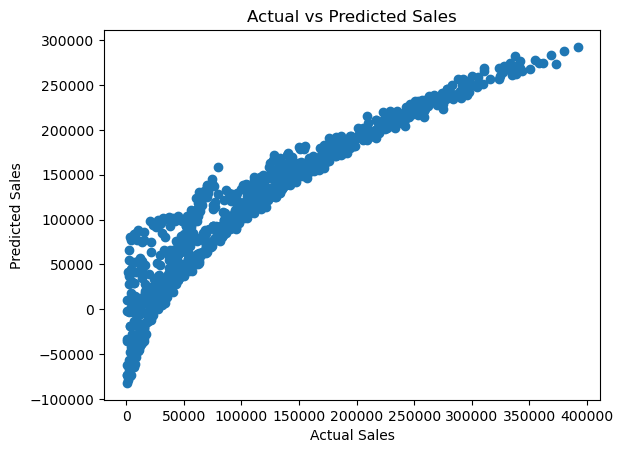

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [34]:
y_pred=np.where(y_pred<0,0,y_pred)

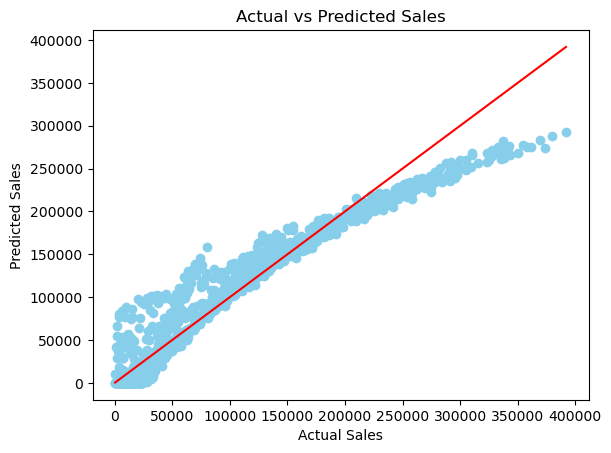

In [36]:
plt.scatter(y_test,y_pred,color='skyblue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title("Actual vs Predicted Sales")
plt.show()

In [39]:
from sklearn.metrics import r2_score,mean_squared_error

In [40]:
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.9005450987553804
RMSE: 27495.258967103928


In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


In [43]:
poly_model = LinearRegression()
poly_model.fit(x_poly, y_train)

LinearRegression()

In [44]:
y_pred_poly = poly_model.predict(x_test_poly)
y_pred_poly = np.where(y_pred_poly < 0, 0, y_pred_poly)

In [45]:
print("R² Score:", r2_score(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))

R² Score: 0.9988842015291419
RMSE: 2912.3099915472135


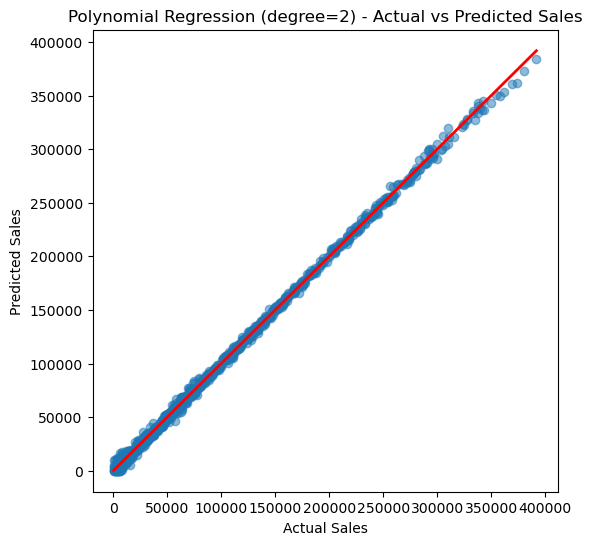

In [46]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Polynomial Regression (degree=2) - Actual vs Predicted Sales")
plt.show()